# Demo of Basic Data Exploration in Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from platform import python_version
python_version()

'3.8.3'

## Setup – create and save a csv file with example data

In [2]:
np.random.seed(1)
labels = np.random.choice(["", "BAD"], p=[0.6, 0.4], size=8);
random_numbers = [np.random.random() if x != "BAD" else "#VALUE" for x in labels]
df = pd.DataFrame(
    {
        "A": pd.date_range("2013-01-02", "2013-01-09"),
        "B": "foo",
        "C": np.arange(3, 11),  # int64
        "D": np.array([5] * 8, dtype="int32"),
        "E": np.random.random(8),
        "F": random_numbers,
        "G": labels,
        "H": pd.Categorical(["day", "night"]*4)
    },
    index = np.arange(100, 108)
)
df.to_csv("my_data.csv")

## Demonstrate loading CSV file and quickly looking at data

In [3]:
df = pd.read_csv("my_data.csv")
df.head()

,Unnamed: 0,A,B,C,D,E,F,G,H
0,100,2013-01-02,foo,3,5,0.670468,0.39676747423066994,NaN,day
1,101,2013-01-03,foo,4,5,0.417305,#VALUE,BAD,night
2,102,2013-01-04,foo,5,5,0.558690,0.538816734003357,NaN,day
3,103,2013-01-05,foo,6,5,0.140387,0.4191945144032948,NaN,night
4,104,2013-01-06,foo,7,5,0.198101,0.6852195003967595,NaN,day


In [4]:
# Reload, assigning selected column as index
df = pd.read_csv("my_data.csv", index_col=0)
df.index.name = 'ID'
df.head()

,A,B,C,D,E,F,G,H
ID,,,,,,,,
100,2013-01-02,foo,3,5,0.670468,0.39676747423066994,NaN,day
101,2013-01-03,foo,4,5,0.417305,#VALUE,BAD,night
102,2013-01-04,foo,5,5,0.558690,0.538816734003357,NaN,day
103,2013-01-05,foo,6,5,0.140387,0.4191945144032948,NaN,night
104,2013-01-06,foo,7,5,0.198101,0.6852195003967595,NaN,day


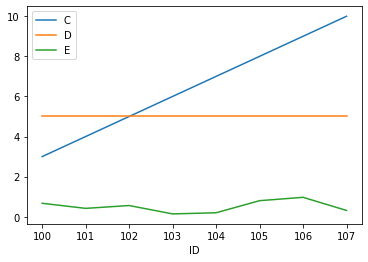

In [5]:
df.plot()  # No settings; "does it's best"
plt.show()

In [6]:
df.describe()

,C,D,E
count,8.00000,8.0,8.000000
mean,6.50000,5.0,0.508423
std,2.44949,0.0,0.293687
min,3.00000,5.0,0.140387
25%,4.75000,5.0,0.284594
50%,6.50000,5.0,0.487997
75%,8.25000,5.0,0.703037
max,10.00000,5.0,0.968262


In [7]:
# Inspect inferred types
df.dtypes

A     object
B     object
C      int64
D      int64
E    float64
F     object
G     object
H     object
dtype: object

## More in-depth pre-processing and visualisations

In [8]:
df['A'] = pd.to_datetime(df['A'])

number_cols = ['C', 'D', 'E', 'F']
for label in number_cols:
    df[label] = pd.to_numeric(df[label], errors="coerce")

df.dtypes

A    datetime64[ns]
B            object
C             int64
D             int64
E           float64
F           float64
G            object
H            object
dtype: object

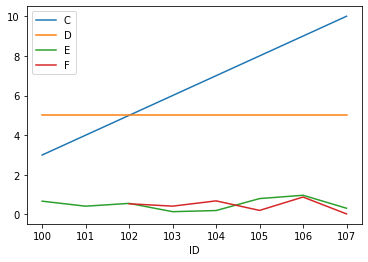

In [9]:
df[number_cols].plot()
plt.show()

In [10]:
df.describe()

,C,D,E,F
count,8.00000,8.0,8.000000,7.000000
mean,6.50000,5.0,0.508423,0.449994
std,2.44949,0.0,0.293687,0.285534
min,3.00000,5.0,0.140387,0.027388
25%,4.75000,5.0,0.284594,0.300610
50%,6.50000,5.0,0.487997,0.419195
75%,8.25000,5.0,0.703037,0.612018
max,10.00000,5.0,0.968262,0.878117


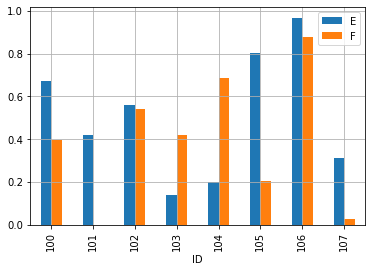

In [11]:
df[['E', 'F']].plot.bar()
plt.grid()

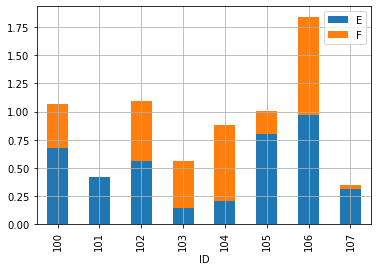

In [12]:
df[['E', 'F']].plot.bar(stacked=True)
plt.grid()

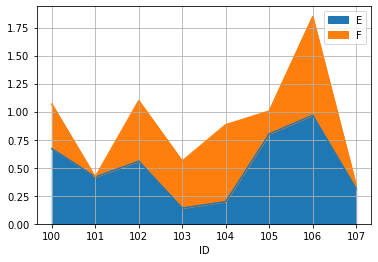

In [13]:
df[['E', 'F']].plot.area(stacked=True)
plt.grid()

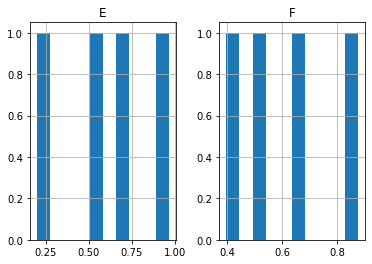

In [14]:
df.loc[df['H'] == 'day', ['E', 'F']].hist()
plt.show()

In [15]:
df['G'].value_counts()

BAD    1
Name: G, dtype: int64

In [16]:
df.groupby('G')[['E', 'F']].count()

,E,F
G,,
BAD,1,0
